In [3]:
from __future__ import print_function, division
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random, permutation, randint
from matplotlib import pyplot as plt

In [1]:
def lin(a,b,x): return a*x+b

In [13]:
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def sse(y,y_pred): return ((y-y_pred)**2).sum()

### Creating some points for the regression

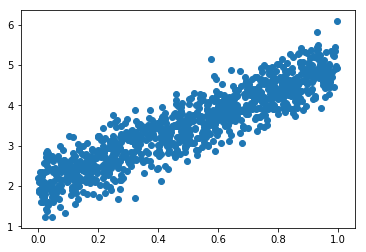

In [110]:
#Get points on a line and add some noise
a=3
b=2
n=int(1e3)
noise=np.random.normal(0,.4,n)
x = random(n)
y = lin(a,b,x)+noise
plt.scatter(x,y)

In [9]:
#Start at some Point

a_start=-5
b_start= -1
lr=0.01

In [10]:
# Batch Gradient Descent
def upd(x,y):
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    a_guess = a_guess - lr * len(x)**-1*((y_pred-y) * x).sum()
    b_guess = b_guess - lr * len(x)**-1*((y_pred-y)).sum()

In [44]:
# Stochastic Gradient Descent
def upd_stoastic(x,n):
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x[n]) # only calc the cost and gradients for the one example we are currently looking ad.
    a_guess = a_guess - lr * (y_pred-y[n])*x[n]
    b_guess = b_guess - lr * (y_pred-y[n])

In [28]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert inputs.shape[0] == targets.shape[0]
    if shuffle:
        indices = np.arange(inputs.shape[0])
        np.random.shuffle(indices)
    for start_idx in range(0, inputs.shape[0], batchsize):
        end_idx = min(start_idx + batchsize, inputs.shape[0])
        if shuffle:
            excerpt = indices[start_idx:end_idx]
        else:
            excerpt = slice(start_idx, end_idx)
        yield inputs[excerpt], targets[excerpt]

## Apply Batch Gradient Descent

On CPU:

In [23]:

a_guess=a_start
b_guess=b_start
global run
run=0
for i in range(10000):
    run=run+1
    upd(x,y) 
print( "Run=%s, Loss= %.10s\na_guess= %.10s, b_guess= %.10s\na=%.10s, b=%.10s" % (run, loss(y,a_guess,b_guess,x),a_guess,b_guess,a,b))
    

Run=10000, Loss= 170.551231
a_guess= 3.05446553, b_guess= 1.93839855
a=3, b=2
Wall time: 219 ms


On GPU

In [16]:
# Move Data to Torch GPU Tensor:
import torch
x_t=torch.from_numpy(x).cuda()
y_t=torch.from_numpy(y).cuda()

In [25]:

a_guess=a_start
b_guess=b_start
global run
run=0
for i in range(10000):
    run=run+1
    upd(x_t,y_t)    
a_guess=a_guess.cpu().numpy()
b_guess=b_guess.cpu().numpy()
print( "Run=%s, Loss= %.10s\na_guess= %.10s, b_guess= %.10s\na=%.10s, b=%.10s" % (run, loss(y,a_guess,b_guess,x),a_guess,b_guess,a,b))
    

Run=10000, Loss= 170.551231
a_guess= 3.05446553, b_guess= 1.93839855
a=3, b=2
Wall time: 10.2 s


In [103]:
y_pred = lin(a_guess, b_guess, x[n]) # only calc the cost and gradients for the one example we are currently looking ad.
y_pred    

3.4556740823116443

In [ ]:
    a_guess = a_guess - lr * (y_pred-y[n])*x[n]
    b_guess = b_guess - lr * (y_pred-y[n])

## Apply Stochastic Batch Gradient Descent

On CPU

In [111]:
a_guess=a_start
b_guess=b_start
global run
run=0
ind_shuffle = np.arange(len(x))
np.random.seed(123)
np.random.shuffle(ind_shuffle)
x=x[ind_shuffle]
y=y[ind_shuffle]

In [115]:

for i in range(10):
    global run
    run=run+1
    for n in range(0,len(x)): 
            upd_stoastic(x,n)
            #print( "Run=%s, Loss= %.10s\na_guess= %.10s, b_guess= %.10s\na=%.10s, b=%.10s" % (run, loss(y,a_guess,b_guess,x),a_guess,b_guess,a,b))

print( "Run=%s, Loss= %.10s\na_guess= %.10s, b_guess= %.10s\na=%.10s, b=%.10s" % (run, loss(y,a_guess,b_guess,x),a_guess,b_guess,a,b))

Run=40, Loss= 149.020539
a_guess= 2.95897337, b_guess= 1.96834614
a=3, b=2
Wall time: 38 ms


On GPU

In [113]:
a_guess=a_start
b_guess=b_start
global run
run=0
x_t=torch.from_numpy(x).cuda()
y_t=torch.from_numpy(x).cuda()

In [116]:

for i in range(10):
    run=run+1
    for n in range(0,len(x_t)): 
            upd_stoastic(x_t,n)
a_guess=a_guess.cpu().numpy()
b_guess=b_guess.cpu().numpy()
print( "Run=%s, Loss= %.10s\na_guess= %.10s, b_guess= %.10s\na=%.10s, b=%.10s" % (run, loss(y,a_guess,b_guess,x),a_guess,b_guess,a,b))

Run=50, Loss= 149.026772
a_guess= 2.96279783, b_guess= 1.96623387
a=3, b=2
Wall time: 8.89 s
